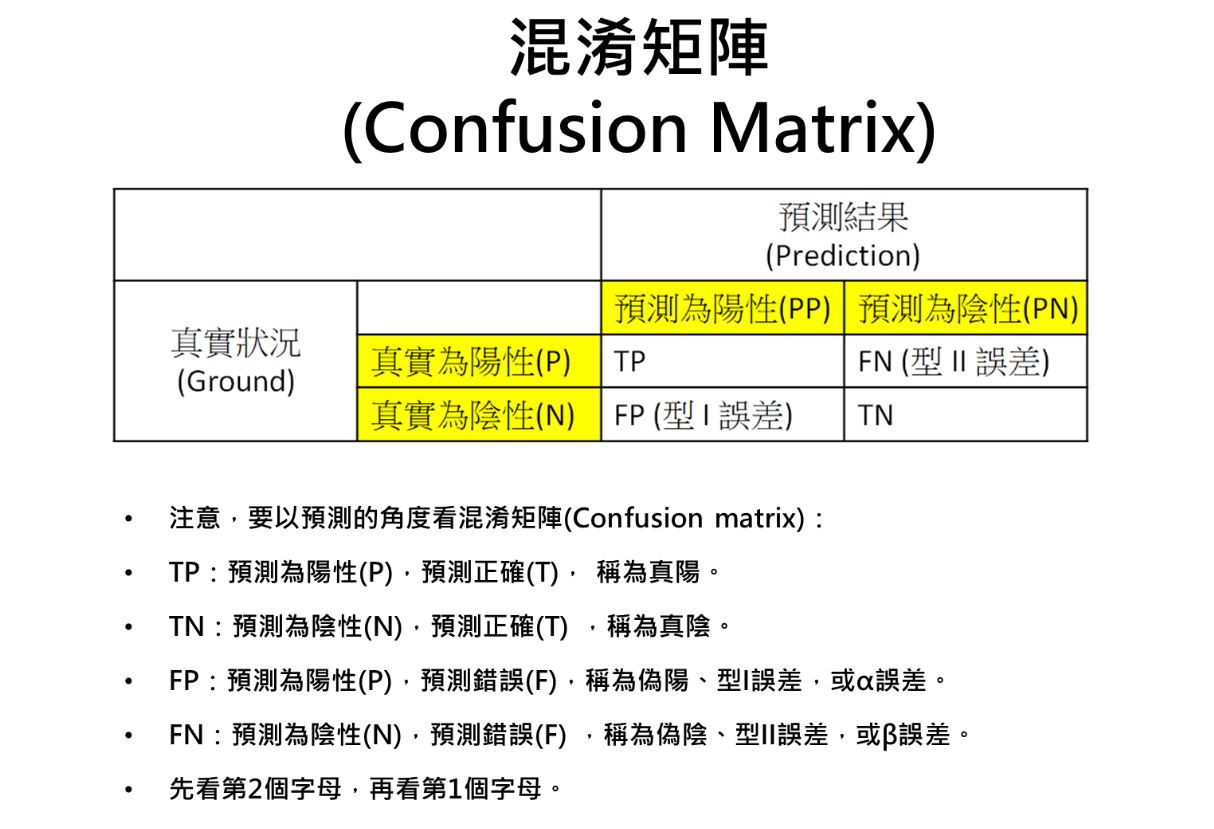

## 假設有8筆資料 [0, 0, 0, 1, 1, 1, 1, 1]
## 模型預測結果為[0, 1, 0, 1, 0, 1, 0, 1]
## 請先以人工計算混淆矩陣，再撰寫程式計算/繪製混淆矩陣。


### 混淆矩陣 (Confusion Matrix)

| 實際狀況 (Ground)    | 預測為陽性 (PP)    | 預測為陰性 (PN)    |
|----------------------|--------------------|--------------------|
| **真實為陽性 (P)**   | TP (真陽性)  3      | FN (假陰性)2        |
| **真實為陰性 (N)**   | FP (假陽性)   1     | TN (真陰性) 2       |

**註解：**
- **TP (真陽性)**：模型正確預測為陽性
- **FN (假陰性)**：模型錯誤預測為陰性（實際為陽性）
- **FP (假陽性)**：模型錯誤預測為陽性（實際為陰性）
- **TN (真陰性)**：模型正確預測為陰性

In [1]:
y_true = [0, 0, 0, 1, 1, 1, 1, 1]
y_pred = [0, 1, 0, 1, 0, 1, 0, 1]
from sklearn.metrics import confusion_matrix
"""
    0   1
0  TN  FP 
1  FN  TP
"""
print(confusion_matrix(y_true, y_pred))
"""
    1   0
1  TP  FN 
0  FP  TN
"""
print(confusion_matrix(y_true, y_pred, labels=[1, 0]))

[[2 1]
 [2 3]]
[[3 2]
 [1 2]]


In [2]:
# 取得混淆矩陣的4個格子
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
tn, fp, fn, tp

(2, 1, 2, 3)

## 繪製混淆矩陣

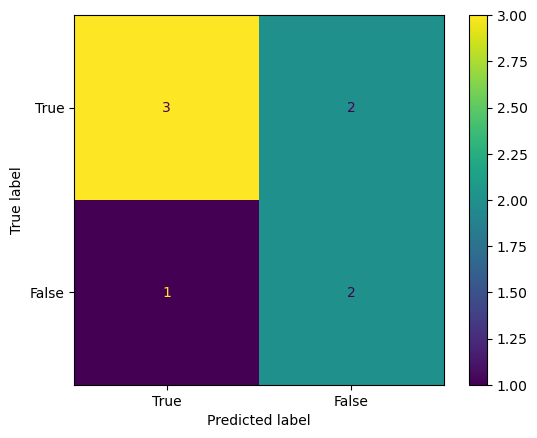

In [3]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

plt.rcParams['axes.unicode_minus'] = False

ConfusionMatrixDisplay.from_predictions(y_true, y_pred,
                              labels=[1, 0],           
                              display_labels=['True', 'False']);

# 常用效能衡量指標 用於分類

## 為何需要其他效能衡量指標？

儘管準確率是一個直觀的衡量模型整體效能的指標，但它並不總是提供足夠的信息來評估模型在特定應用中的表現。特別是在類別不平衡的情況下，準確率可能會產生誤導。例如，在醫療診斷和安全監控等領域，錯過少數重要的正例（如病患或恐怖分子）可能比誤判多數的負例帶來更嚴重的後果。

### 醫療診斷示例

假設在一個醫療檢測中，只有5%的人是真正罹患某種疾病的。如果診斷設備故障，導致無法檢測出任何人罹患疾病，那麼該設備當天的準確率將是：

$$ \text{Accuracy} = 1 - \text{Error Rate} = 1 - 0.05 = 95\% $$

雖然這看似高準確率，但這完全忽略了對那5%真正需要被診斷出的病人的影響，顯示出單靠準確率無法完全評估診斷工具的效能。

### 機場通關檢驗示例

考慮美國每年有800萬個航空旅客，從2000年到2017年期間共有19名恐怖份子搭乘飛機。如果通關檢驗未能抓到任何一個恐怖份子，那麼該檢驗的準確率計算如下：

$$ \text{Accuracy} = 1 - \text{Error Rate} = 1 - \frac{19}{8000000 \times 18} \approx 99.9999999\% $$

這表明即使檢驗系統完全失效於其最重要的功能—識別恐怖分子—準確率依然非常高。這種情況下，其他指標如召回率（抓到的恐怖份子與所有恐怖份子的比例）和精確率（抓到的恐怖份子與被錯誤標記的無辜旅客的比例）就顯得格外重要。


### 準確率 (Accuracy)
表示模型正確預測的案例（真陽性和真陰性）占所有案例的比例。公式如下：
$$ \text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN} $$

### 精確率 (Precision)
表示被模型預測為陽性且實際上也為陽性的案例占所有被模型預測為陽性的案例的比例。公式如下：

降低假陽(FP)我提高了病毒的量 並度量要高才算陽 但是有些少量病毒的也因該是陽性所以FN上升
$$ \text{Precision} = \frac{TP}{TP + FP} $$

### 召回率 (Recall) 或稱敏感度 (Sensitivity)
表示被模型預測為陽性且實際上也為陽性的案例占所有實際陽性案例的比例。公式如下：

降低假英(FN)我降低了病毒的量 但是有些少量病毒就算陽 但是這要FP(假陽就可能上升)
$$ \text{Recall} = \frac{TP}{TP + FN} $$

## 精確率 與 召回率 此消彼漲
FP想變小FN有可能多 FN想變小FP可能多這就是 消彼長的關係原因

### F1 Score
為精確率與召回率的調和平均數，是兩者之間的平衡。公式如下：
$$ \text{F1 Score} = \frac{2 \times TP}{2 \times TP + FP + FN} $$

## 預測信用卡詐騙

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
df.Class.value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = df.drop(['Time', 'Amount', 'Class'], axis=1), df['Class']

# 分割資料
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# 模型訓練
clf = LogisticRegression().fit(X_train, y_train)

# 預測
y_pred = clf.predict(X_test)

# 準確率
accuracy_score(y_test, y_pred)

0.999283727985169

In [8]:
# 取得混淆矩陣的4個格子
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(71072, 10, 41, 79)

In [9]:
print(f'準確率(Accuracy)={(tn+tp) / (tn+fp+fn+tp)}')
print(f'精確率(Precision)={(tp) / (fp+tp)}')
print(f'召回率(Recall)={(tp) / (fn+tp)}')
print(f'F1 score={(2*tp) / (2*tp+fp+fn)}')

準確率(Accuracy)=0.999283727985169
精確率(Precision)=0.8876404494382022
召回率(Recall)=0.6583333333333333
F1 score=0.7559808612440191


In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# 計算準確率
accuracy = accuracy_score(y_test, y_pred)
print(f'準確率 (Accuracy) = {accuracy}')

# 計算精確率
precision = precision_score(y_test, y_pred)
print(f'精確率 (Precision) = {precision}')

# 計算召回率
recall = recall_score(y_test, y_pred)
print(f'召回率 (Recall) = {recall}')

# 計算 F1 score
f1 = f1_score(y_test, y_pred)
print(f'F1 score = {f1}')

準確率 (Accuracy) = 0.999283727985169
精確率 (Precision) = 0.8876404494382022
召回率 (Recall) = 0.6583333333333333
F1 score = 0.7559808612440191


# 繪製ROC曲線

### 接收操作特徵圖 (Receiver Operator Characteristic, ROC)

在各種決策門檻 (decision threshold) 下，比較『真陽率』(True Positive Rate；TPR) 與『假陽率』(False Positive Rate；FPR) 間的變化。

### 曲線下面積 (Area Under the Curve, AUC)

AUC 面積大小可視為模型的效能表現，常用於比較多個模型的效能表現。

對角線為隨機猜測的效能，低於對角線表示模型效能比隨機猜測還差。
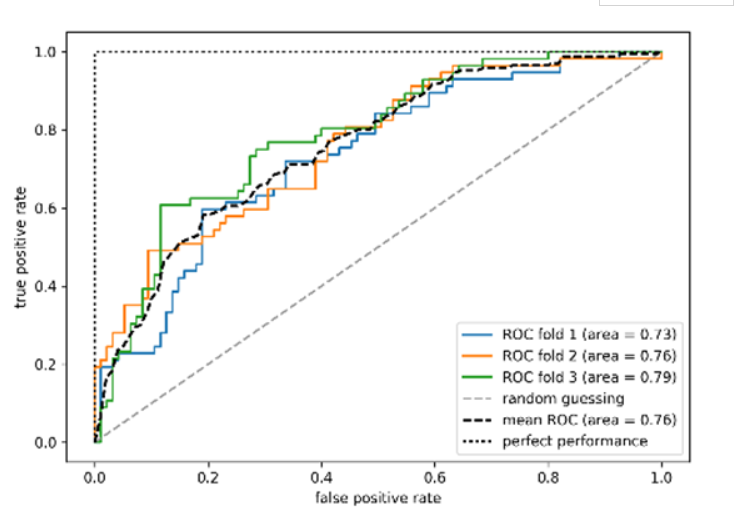

在 ROC 曲線中，橫軸是 FPR，縱軸是 TPR。ROC 曲線展示了模型在不同決策門檻下的 TPR 與 FPR 之間的權衡。

### AUC（曲線下面積）

AUC 是 ROC 曲線下面積，範圍從 0 到 1。AUC 的值可以解釋為模型在隨機挑選一對正負樣本時，正樣本得分高於負樣本的概率。

- **AUC = 1.0**：模型的分類性能非常好，能夠完美地將所有正負樣本區分開來。
- **0.5 < AUC < 1.0**：模型具有一定的區分能力，AUC 值越高，模型性能越好。
- **AUC = 0.5**：模型的分類性能與隨機猜測無異。
- **AUC < 0.5**：模型的分類性能比隨機猜測還差，這種情況通常意味著模型存在嚴重問題。

### AUC 的優點

1. **不受類別不平衡的影響**：AUC 是對模型整體性能的綜合評估，不會因類別不平衡而受到極端值的影響。
2. **直觀易理解**：AUC 提供了一個簡單明了的數值，可以直接用來比較不同模型的性能。


## ROC 曲線繪製
- 根據每個測試樣本屬於P的機率值從大到小排序。
- 從高到低，依次將Score值作為決策門檻。
- 統計P及N總數，Y軸畫P格，X軸畫N格，如下圖，5個P ，15個N。
- 逐步調降Score，遇P往上，遇N往右。
-  Score 是模型對某個樣本屬於P的預測概率。例如，某個樣本的 Score 為 0.8，表示模型認為該樣本屬於P的機率為 80%。

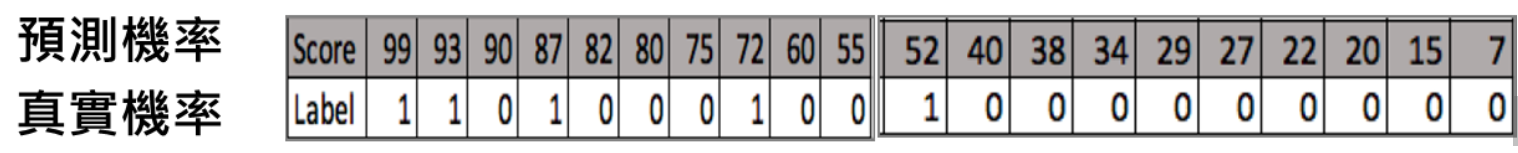

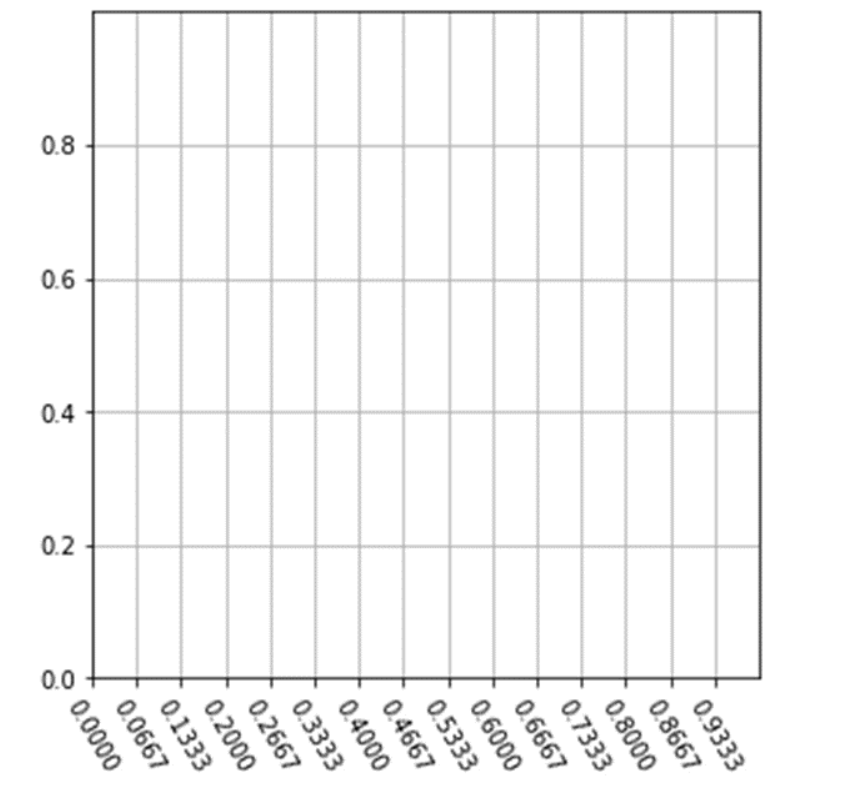
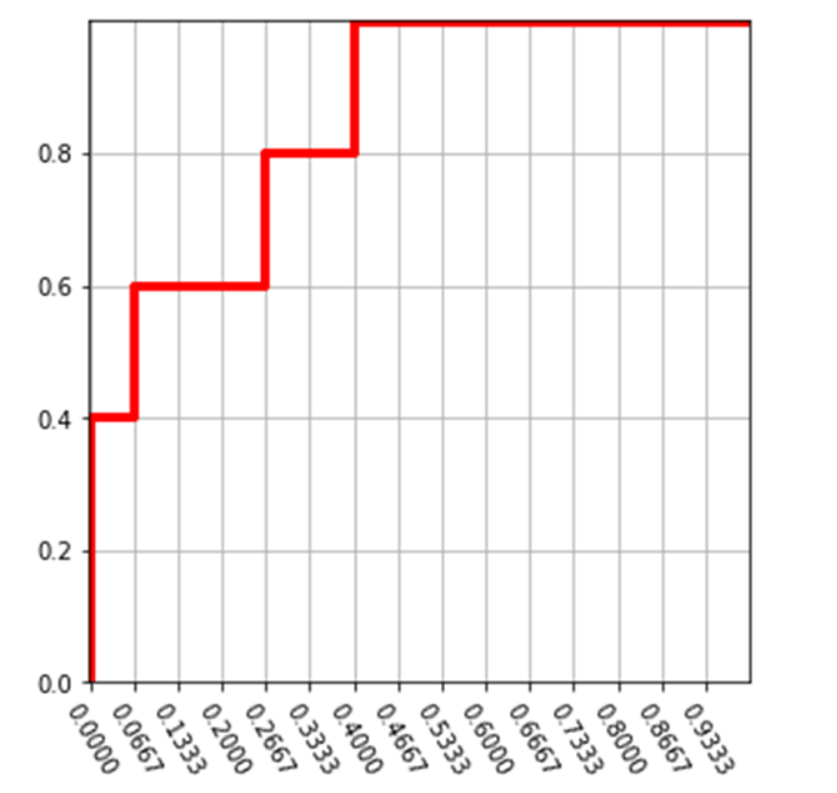

In [11]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
df=pd.read_csv('roc_test_data.csv')
df


,predict,actual
0,0.11,0
1,0.35,0
2,0.72,1
3,0.10,1
4,0.99,1
5,0.44,1
6,0.32,0
7,0.80,1
8,0.22,1
9,0.08,0


## Scikit-Learn 作法

In [12]:
from sklearn.metrics import roc_curve, roc_auc_score, auc

fpr, tpr, threshold = roc_curve(df['actual'], df['predict'])
print(f'FP:\n{fpr}\n\nTP:\n{tpr}\n\nthreshold:{threshold}')

FP:
[0.         0.         0.         0.14285714 0.14285714 0.28571429
 0.28571429 0.57142857 0.57142857 0.71428571 0.71428571 1.        ]

TP:
[0.         0.09090909 0.27272727 0.27272727 0.63636364 0.63636364
 0.81818182 0.81818182 0.90909091 0.90909091 1.         1.        ]

threshold:[ inf 0.99 0.8  0.73 0.56 0.48 0.42 0.32 0.22 0.11 0.1  0.03]


## 繪製ROC曲線

Text(0.5, 0, 'FP')

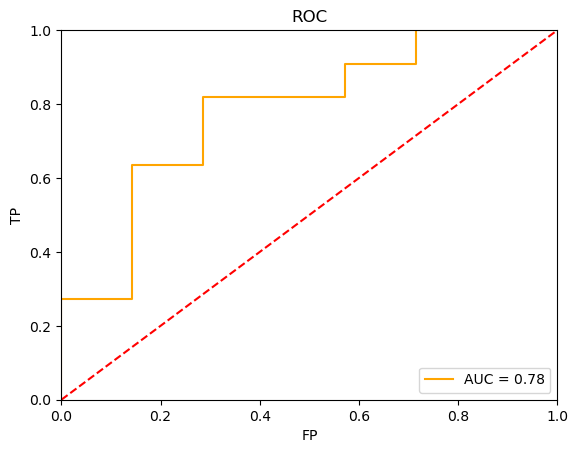

In [13]:
auc1 = auc(fpr, tpr)
plt.title('ROC')
plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc1)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('TP')
plt.xlabel('FP')

# MinMaxScaler

## 適用於離散型資料

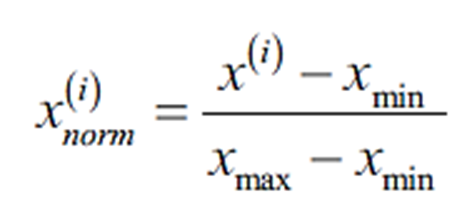

In [14]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

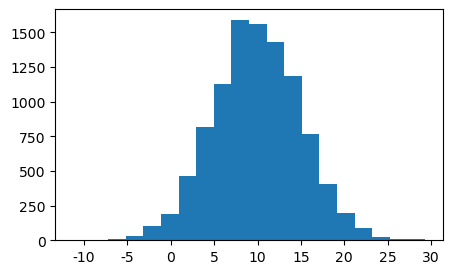

In [15]:
# 常態分配
data = np.random.normal(10, 5, 10000)
plt.figure(figsize=(5,3));
plt.hist(data, 20)
plt.show()

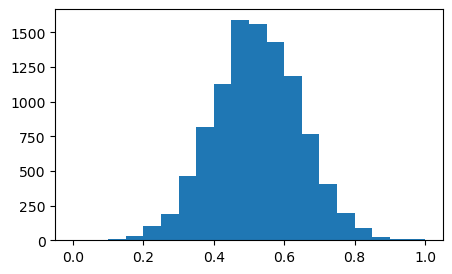

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_new =scaler.fit_transform(data.reshape(-1, 1))
plt.figure(figsize=(5,3));
plt.hist(data_new, 20)
plt.show()

# StandardScaler
## 適合連續型的資料
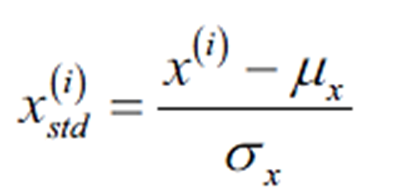

In [17]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

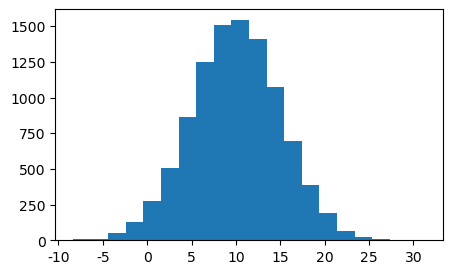

In [18]:
# 常態分配
data = np.random.normal(10, 5, 10000)
plt.figure(figsize=(5,3));
plt.hist(data, 20)
plt.show()

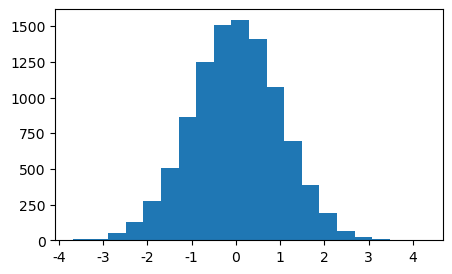

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_new =scaler.fit_transform(data.reshape(-1, 1))
plt.figure(figsize=(5,3));
plt.hist(data_new, 20)
plt.show()

# 多重共線性(Multicollinearity)


In [20]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

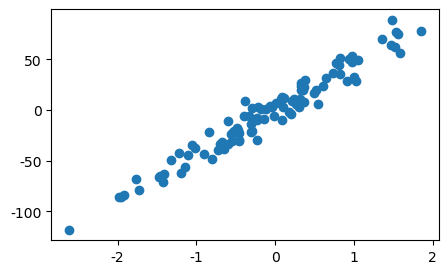

In [21]:
from sklearn.datasets import make_regression
X, y = make_regression(n_samples=100, n_features=1, noise=10, random_state=42)

plt.figure(figsize=(5,3));
plt.scatter(X, y)
plt.show()

## 迴歸

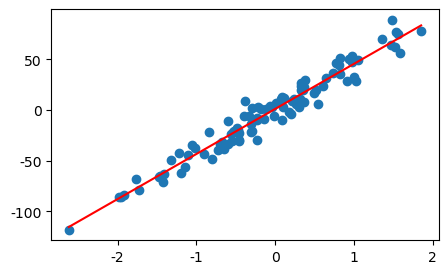

In [22]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)
X_pred = np.linspace(np.min(X.reshape(-1)), np.max(X.reshape(-1)), 20)
y_pred = X_pred * model.coef_[0] + model.intercept_
plt.figure(figsize=(5,3));
plt.scatter(X, y)
plt.plot(X_pred, y_pred, c='red')
plt.show()

In [23]:
model.score(X, y)

0.9538252459635717

In [24]:
model.coef_

array([44.43716999])

In [25]:
y_pred = 10 * model.coef_[0] + model.intercept_
print(y_pred)

445.5368152430766


## 產生X的共線資料

In [26]:
X2 = X.copy()
X_new = np.hstack((X, X2))
print(X_new.shape)
print(X_new)

(100, 2)
[[ 0.93128012  0.93128012]
 [ 0.08704707  0.08704707]
 [-1.05771093 -1.05771093]
 [ 0.31424733  0.31424733]
 [-0.47917424 -0.47917424]
 [ 0.64768854  0.64768854]
 [-0.46341769 -0.46341769]
 [ 0.54256004  0.54256004]
 [ 0.61167629  0.61167629]
 [ 1.0035329   1.0035329 ]
 [ 0.8219025   0.8219025 ]
 [ 1.53803657  1.53803657]
 [ 0.73846658  0.73846658]
 [-0.21967189 -0.21967189]
 [-0.8084936  -0.8084936 ]
 [ 0.09176078  0.09176078]
 [-1.95967012 -1.95967012]
 [ 0.51326743  0.51326743]
 [ 1.03099952  1.03099952]
 [-2.6197451  -2.6197451 ]
 [ 0.49671415  0.49671415]
 [ 0.09707755  0.09707755]
 [-0.46572975 -0.46572975]
 [ 0.91540212  0.91540212]
 [ 1.56464366  1.56464366]
 [ 1.46564877  1.46564877]
 [-0.60063869 -0.60063869]
 [-0.03582604 -0.03582604]
 [-0.60170661 -0.60170661]
 [-1.19620662 -1.19620662]
 [ 0.35711257  0.35711257]
 [ 0.37569802  0.37569802]
 [ 0.26105527  0.26105527]
 [-0.5297602  -0.5297602 ]
 [-0.90802408 -0.90802408]
 [ 0.19686124  0.19686124]
 [-0.29900735 -0.29

## 迴歸

In [27]:
from sklearn.linear_model import LinearRegression
model2 = LinearRegression()
model2.fit(X_new, y)
model2.score(X_new, y)

0.9538252459635717

In [28]:
model2.coef_

array([22.218585, 22.218585])

## 無共線

In [29]:
y_pred = 10 * model.coef_[0] + model.intercept_
print(y_pred)

445.5368152430766


In [30]:
X_test = [[10, 0]]#因為共線性所以設為0對結果影響很大
model2.predict(X_test)

array([223.35096528])

In [31]:
X_test = [[10, 10]]
model2.predict(X_test)

array([445.53681524])

## Variance Inflation Factor(VIF)
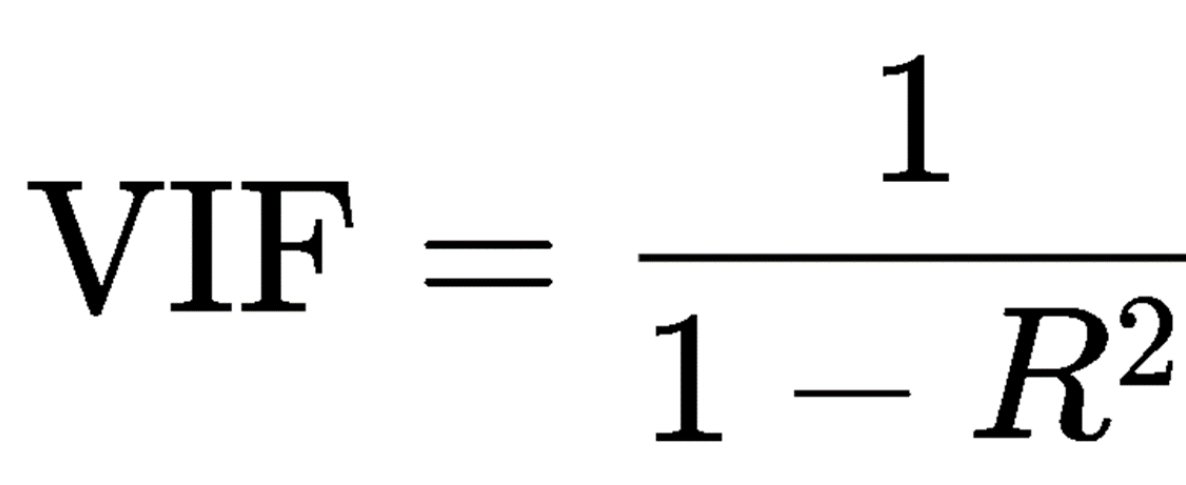


R^2越靠近1表示X2與X3越能表示X1 表示共線機率大

使用X2與X3預測X1的R^2是多少 作為VIF的R^2

VIF越大表示共線性越大

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the dataset
data = pd.read_csv('BMI.csv')

# creating dummies for gender
data['Gender'] = data['Gender'].map({'Male':0, 'Female':1})

# the independent variables set
X = data[['Gender', 'Height', 'Weight']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
print(vif_data)
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
#VIF 值大於 5 或 10 通常會被認為存在多重共線性。
#高 VIF 值意味著該特徵可能可以由其他特徵推導出
#Height與Weight 有高度共線性 可以轉換成bmi
vif_data

  feature
0  Gender
1  Height
2  Weight


,feature,VIF
0,Gender,2.028864
1,Height,11.623103
2,Weight,10.688377


## 特徵選取演算法

常見演算法：


Sequential Feature Selection(SFS)。循序加入最具影響力的特徵，直到特徵數達到要求的個數。


Recursive Feature Elimination (RFE) 。每次都移除最不重要的特徵

Permutation Feature Importance(PFI)。每個特徵值打亂重新排序，其他特徵值保持不變


# Sequential Feature Selection(SFS)

In [33]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [34]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [38]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [39]:
clf.score(X_test_std, y_test)

0.9887640449438202

## 測試選取3個特徵的所有組合

In [40]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SequentialFeatureSelector

knn = KNeighborsClassifier(n_neighbors=11)#使用最近鄰打分數
sfs = SequentialFeatureSelector(knn, n_features_to_select=3)#選三個
sfs.fit(X_train_std, y_train)
sfs.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True, False, False])

In [41]:
# 特徵選取名稱
column_list = np.array(X.columns.to_list())
column_list[sfs.get_support()]

array(['flavanoids', 'color_intensity', 'hue'], dtype='<U28')

In [42]:
# 特徵選取後的 X
sfs.transform(X_train_std).shape

(89, 3)

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [44]:
clf.fit(sfs.transform(X_train_std), y_train)

LogisticRegression()

In [45]:
clf.score(sfs.transform(X_test_std), y_test)

0.8539325842696629

# Recursive Feature Elimination (RFE)

In [46]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [47]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [51]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [52]:
clf.score(X_test_std, y_test)

0.9887640449438202

## 測試選取3個特徵的所有組合

In [53]:
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# RFE 使用的評估演算法必須支援 coef_ or feature_importances_ 屬性，KNN 不適用
clf = LogisticRegression()
model = RFE(clf, n_features_to_select=3)
model.fit(X_train_std, y_train)
model.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True, False, False,  True])

In [54]:
column_list = np.array(X.columns.to_list())
column_list[model.get_support()]

array(['flavanoids', 'color_intensity', 'proline'], dtype='<U28')

In [55]:
# 特徵選取後的 X
model.transform(X_train_std).shape

(89, 3)

In [56]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [57]:
clf.fit(model.transform(X_train_std), y_train)

LogisticRegression()

In [58]:
clf.score(model.transform(X_test_std), y_test)

0.9662921348314607

# Permutation Feature Importance(PFI)

In [59]:
from sklearn.datasets import load_wine
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt


In [60]:
X, y = load_wine(return_X_y=True, as_frame=True)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [62]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [63]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [64]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [65]:
clf.score(X_test_std, y_test)

0.9887640449438202

In [66]:
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
clf = KNeighborsClassifier()
clf.fit(X_train_std, y_train)
#n_repeats 做10次
model = permutation_importance(clf, X_test_std, y_test, n_repeats=10)
#
#特徵重要性的平均數與標準差
#假設n_repeats=10 model.importances_mean表示做10次評估的平值
#model.importances_std 表示做10次評估的的變異性
model.importances_mean, model.importances_std

(array([ 0.05280899,  0.01797753,  0.02696629,  0.00224719,  0.01011236,
        -0.00561798,  0.01235955, -0.01011236, -0.00674157,  0.04044944,
         0.01573034,  0.01235955,  0.05955056]),
 array([0.02249998, 0.01145847, 0.01029792, 0.01100894, 0.01700309,
        0.01256218, 0.01371523, 0.01059998, 0.01029792, 0.01893517,
        0.01029792, 0.01842834, 0.02888755]))

In [67]:
# 特徵選取名稱
column_list = np.array(X.columns.to_list())

column_selected = []
for i in model.importances_mean.argsort()[::-1]:
    #標準差 在此表示每次計算特徵重要性的變化性 起伏的一個狀態 也可以說穩定性
    #特徵重要性平均數 - 2倍特徵重要性標準差 意思是 此特徵重要性平均 很穩定標準差不算大就算2倍標準差也沒超過
    #簡單來說就是2倍標準差沒超過平均數 算很穩定
    #另外表示特徵平均數是正的 表示正相關
    if model.importances_mean[i] - 2 * model.importances_std[i] > 0:
        print(f"{column_list[i]:20s} "
              f"{model.importances_mean[i]:.3f}"
              f" +/- {model.importances_std[i]:.3f}")
        column_selected.append(column_list[i])

proline              0.060 +/- 0.029
alcohol              0.053 +/- 0.022
color_intensity      0.040 +/- 0.019
ash                  0.027 +/- 0.010


In [68]:
# 特徵選取後的 X
X[column_selected].shape

(178, 4)

In [69]:
X = X[column_selected]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X.values, y, test_size=0.5, random_state=42)

In [71]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [72]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [73]:
clf.fit(X_train_std, y_train)

LogisticRegression()

In [74]:
clf.score(X_test_std, y_test)

0.9101123595505618

# Scikit-learn PCA 實作

In [75]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [76]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [77]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 指定X、Y
X = df.values
y = ds.target

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [79]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=2)
X_train_pca = pca1.fit_transform(X_train_std)
X_test_pca = pca1.transform(X_test_std)
X_train_pca.shape, X_test_pca.shape, pca1.explained_variance_ratio_
#array([0.36581713, 0.18242938])表示變異性

((142, 2), (36, 2), array([0.36786645, 0.19137752]))

In [80]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [81]:
clf.fit(X_train_pca, y_train)

LogisticRegression()

In [82]:
# 計算準確率
y_pred = clf.predict(X_test_pca)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

94.44%


# Scikit-learn LDA實作

In [83]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data, columns=ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [85]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 指定X、Y
X = df.values
y = ds.target

# 資料分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

# 查看陣列維度
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 特徵萃取(LDA)

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std, y_train)
X_test_lda = lda.transform(X_test_std)
X_train_lda.shape, X_test_lda.shape, lda.explained_variance_ratio_

((142, 2), (36, 2), array([0.71778595, 0.28221405]))

In [88]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [89]:
clf.fit(X_train_lda, y_train)

LogisticRegression()

In [90]:
# 計算準確率
y_pred = clf.predict(X_test_lda)
print(f'{accuracy_score(y_test, y_pred)*100:.2f}%') 

97.22%
